In [12]:
import qiskit
from qiskit import * 
from qiskit.tools import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np
#from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter

def run_program(circuit, qubit_num, tries, type_of_comp = "" ):
    IBMQ.load_account()
    if(type_of_comp == "q_sim"):
        sim_backend = Aer.get_backend ("qasm_simulator")
        job = execute(circuit, backend = sim_backend, shots = tries)
        return job.result()
    if(type_of_comp == 'state_vec'):
        sim_backend = Aer.get_backend("statevector_simulator")
        return execute(circuit, backend = sim_backend).result().get_statevector()
    
    provider = IBMQ.get_provider(hub = "ibm-q")
    pendJob = 1000
    for backend in provider.backends():
        try: 
            qubit_count = len(backend.properties().qubits)
            if((backend.status().pending_jobs < pendJob) and (qubit_count >= qubit_num)):
                pendJob = backend.status().pending_jobs
                currentComp = backend.name()
                amount_of_qubits = qubit_count
        except:
            pass
    print(f"{currentComp}: {pendJob} jobs, Available resources: {amount_of_qubits} qubits")
        
    backend = provider.get_backend(currentComp)
    job = execute(circuit, backend = backend, shots = tries)
    job_monitor(job)
        
#    if(type_of_comp == 'mit'):
#       cal_circuits, state_labels - complete_meas_cal(qr = circuit.qregs[0], circlablel = 'calibration')
#        cal_job = execute(cal_circuits, backend = provider.get_backend('ibmqx2'), shots = tries, optimization_level = 0)
#        cal_results = cal_job.result()
#        meas_fitter = CompleteMeasFitter(cal_results, statelabels)
#        meas_filter = meas_fitter.filter
#        return meas_filter.apply(job.result)
    
    return job.result()

ibmqfactory.load_account:WARNING:2020-11-08 10:21:05,379: Credentials are already in use. The existing account in the session will be replaced.


ibmq_vigo: 0 jobs, Available resources: 5 qubits
Job Status: job has successfully run


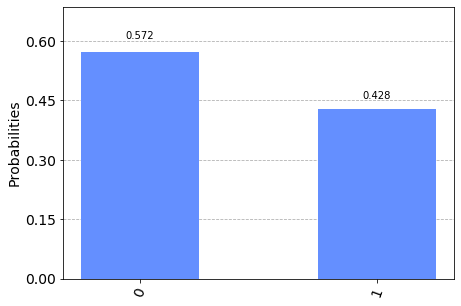

In [15]:
c = QuantumCircuit(1,1)
c.h(0)
c.measure(0,0)
plot_histogram(run_program(c, 1, 5000, " ").get_counts())

ibmqfactory.load_account:WARNING:2020-11-08 10:23:08,256: Credentials are already in use. The existing account in the session will be replaced.


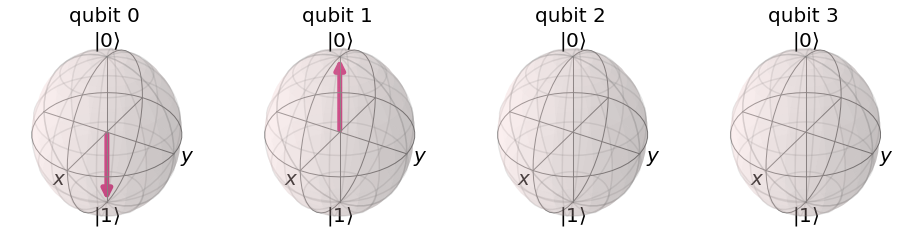

In [17]:
c = QuantumCircuit(4,4)
c.x(0)
c.z(1)
c.h(2)
c.cx(2,3)
plot_bloch_multivector(run_program(c, 0, 0, "state_vec"))